# Simplest possible machine learning example: linear regression

We use linear regression i.e. adjusting a straight line to a set of data points as an example of how we can gradually learn the parameters for a model.

The setup looks like this:

![Linear regression training setup](linear_regression.jpg)

In [34]:
%matplotlib inline

In [35]:
import numpy
from keras.utils import np_utils
import matplotlib.pyplot as plt

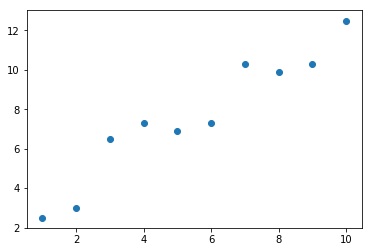

In [36]:
X = numpy.array(range(1,11))
y = numpy.array([2.5, 3, 6.5, 7.3, 6.9, 7.3, 10.3, 9.9, 10.3, 12.5])
x_size = len(X)

def line(k, m):
    return k + m*X

plt.scatter(X, y)

In [40]:
def plot_current_state():
    plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.plot(X, line(k, m), 'r-')
    plt.plot(X, y, 'bo')
    plt.subplot(1,2,2)
    plt.plot(range(len(costs)), costs, 'bo')
    plt.show()

def mean_squared_error(predicted, actual):
    errors = numpy.subtract(predicted, actual)
    squared_errors = numpy.multiply(errors, errors)
    return 0.5 * (1/len(errors)) * numpy.sum(squared_errors) 

def update_weights_with_gradient_descent(k, m):
    errors = numpy.subtract(line(k, m), y)
    k = k - alpha * (1/x_size) * numpy.sum(errors)
    m = m - alpha * (1/x_size) * numpy.sum(numpy.multiply(errors, X))
    return (k, m)

def iteration(k, m, costs):
    cost = mean_squared_error(line(k, m), y)
    costs.append(cost)
    
    (k, m) = update_weights_with_gradient_descent(k, m)
    
    plot_current_state()
    return (k, m, costs)

In [41]:
alpha = 0.01
k = 0
m = 0
costs = []

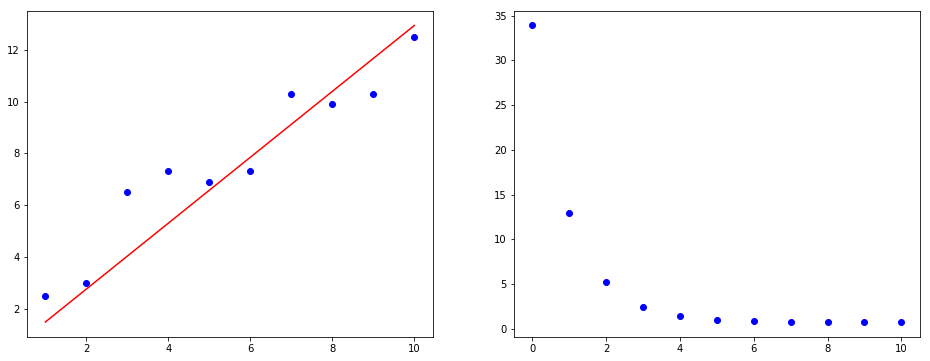

In [52]:
(k, m, costs) = iteration(k, m, costs)